In [1]:
import os
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

pd.set_option('mode.chained_assignment', None)

from evaluate import evaluate

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

## Hippocampus

In [2]:
folders=['DL_all_6000_5_withMouse',
         'DL_var01_6000_5_withMouse'] 

n = len(folders)

prefixs = np.repeat(['../../PSI_prediction/Zenodo/Human/HPC/Predictions/'], n)
multiheads = [True, True]
heads = ['/mouse', '/mouse']

# Relative to the prefix
PSI_glia = np.repeat(['../../PSI_prediction/Zenodo/Mouse/HPC/PSI_glia.csv'], n)
PSI_neur = np.repeat(['../../PSI_prediction/Zenodo/Mouse/HPC/PSI_neur.csv'], n)

res_hpc = evaluate(prefixs, folders, multiheads, heads, PSI_glia, PSI_neur,
             runs=5, folds = [0,1,2,3,4,5,6,7,8,9], split='test', 
             RBP_only=False)

with open('HPC_SAL_MOUSE.pickle', 'wb') as handle:
    pickle.dump(res_hpc, handle, protocol=pickle.HIGHEST_PROTOCOL)


DL_all_6000_5_withMouse
DL_var01_6000_5_withMouse


In [3]:
### Content../../Zenodo/pickle files
# 0 - MSE on all exons neurons
# 1 - MSE on all exons glia
# 2 - spearman correlation all exons neurons
# 3 - spearman correlation all exons glia
# 4 - MSE on variable exons neurons
# 5 - MSE on variable exons glia
# 6 - spearman correlation variable exons neurons
# 7 - spearman correlation variable exons glia
# 8 - F1 scores (classification problem, higher in neurons or higher in glia)
# 9 - true PSI values neurons
# 10 - predicted PSI values neurons
# 11 - true PSI values glia
# 12 - predicted PSi values glia
# 13 - indicating which genes are variable genes

sp_neur = res_hpc[6]
sp_glia = res_hpc[7]

sp_neur.index = [
             'DL - all (seq+splice) - with mouse',
             'DL - var (seq+splice) - with mouse',]

sp_glia.index = [
             'DL - all (seq+splice) - with mouse',
             'DL - var (seq+splice) - with mouse',]

sp_neur = sp_neur.melt(ignore_index=False)
sp_neur['Model'] = sp_neur.index
sp_neur['Cell type'] = 'Neurons'

sp_glia = sp_glia.melt(ignore_index=False)
sp_glia['Model'] = sp_glia.index
sp_glia['Cell type'] = 'Glia'

sp_var = pd.concat((sp_neur, sp_glia))

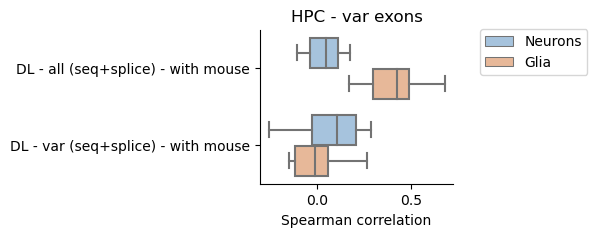

In [4]:
plt.figure(figsize=(2.5,2))
sns.boxplot(data=sp_var, x='value', y='Model', hue='Cell type',
            palette=['#9DC3E6', '#F4B68C'],
            order=[
             'DL - all (seq+splice) - with mouse',
             'DL - var (seq+splice) - with mouse'])
sns.despine()
plt.xlabel('Spearman correlation')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('HPC - var exons')
# plt.savefig('../../Evaluate models/Figures/boxplot_HPC_mouse.pdf',
#            bbox_inches='tight')
plt.show()

### Visual cortex

In [5]:
folders=['DL_all_6000_5_withMouse',
         'DL_var01_6000_5_withMouse'] 

n = len(folders)

prefixs = np.repeat(['../../PSI_prediction/Zenodo/Human/FC/Predictions/'], n)
multiheads = [True, True]
heads = ['/mouse', '/mouse']

# Relative to the prefix
PSI_glia = np.repeat(['../../PSI_prediction/Zenodo/Mouse/VisC/PSI_glia.csv'], n)
PSI_neur = np.repeat(['../../PSI_prediction/Zenodo/Mouse/VisC/PSI_neur.csv'], n)

res_fc = evaluate(prefixs, folders, multiheads, heads, PSI_glia, PSI_neur,
             runs=5, folds = [0,1,2,3,4,5,6,7,8,9], split='test', 
             RBP_only=False)

with open('VisC_SAL_MOUSE.pickle', 'wb') as handle:
    pickle.dump(res_fc, handle, protocol=pickle.HIGHEST_PROTOCOL)


DL_all_6000_5_withMouse
DL_var01_6000_5_withMouse


In [6]:
### Content../../Zenodo/pickle files
# 0 - MSE on all exons neurons
# 1 - MSE on all exons glia
# 2 - spearman correlation all exons neurons
# 3 - spearman correlation all exons glia
# 4 - MSE on variable exons neurons
# 5 - MSE on variable exons glia
# 6 - spearman correlation variable exons neurons
# 7 - spearman correlation variable exons glia
# 8 - F1 scores (classification problem, higher in neurons or higher in glia)
# 9 - true PSI values neurons
# 10 - predicted PSI values neurons
# 11 - true PSI values glia
# 12 - predicted PSi values glia
# 13 - indicating which genes are variable genes

sp_neur = res_fc[6]
sp_glia = res_fc[7]

sp_neur.index = [
             'DL - all (seq+splice) - with mouse',
             'DL - var (seq+splice) - with mouse',]

sp_glia.index = [
             'DL - all (seq+splice) - with mouse',
             'DL - var (seq+splice) - with mouse',]

sp_neur = sp_neur.melt(ignore_index=False)
sp_neur['Model'] = sp_neur.index
sp_neur['Cell type'] = 'Neurons'

sp_glia = sp_glia.melt(ignore_index=False)
sp_glia['Model'] = sp_glia.index
sp_glia['Cell type'] = 'Glia'

sp_var = pd.concat((sp_neur, sp_glia))

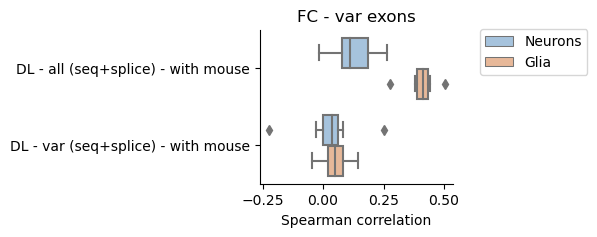

In [7]:
plt.figure(figsize=(2.5,2))
sns.boxplot(data=sp_var, x='value', y='Model', hue='Cell type',
            palette=['#9DC3E6', '#F4B68C'],
            order=[
             'DL - all (seq+splice) - with mouse',
             'DL - var (seq+splice) - with mouse'])
sns.despine()
plt.xlabel('Spearman correlation')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('FC - var exons')
# plt.savefig('../../Evaluate models/Figures/boxplot_FC_mouse.pdf',
#            bbox_inches='tight')
plt.show()